# Predicting heart-disease via ML
This notebook looks into various Python-based ML libraries and data science libraries to predict wether someone has heartdisease based on medical attributes

We are going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether the patient has heartdisease or not?

## 2. Data
from UCI ML repository, see on Kaggle for information about the data: https://www.kaggle.com/datasets/hartman/heart-disease-uci

## 3. Evaluation
> We need a very accurate model: if we can reach 95% at predicting during the proof of concept, we'll pursue the project.

## 4. Features
This is where you get some information about the data.

**create a data dictionary**
1. age - age in years
2. sex (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholostoral in mg/dl
6. serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern
7. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
    restecg - resting electrocardiographic results
   *  0: Nothing to note
   *  1: ST-T Wave abnormality
    can range from mild symptoms to severe problems
    signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertophy
    Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exange - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during exercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
   * 0: Upsloping: better heart rate with exercise (uncommon)
   * 1: Flatsloping: minimal change (typically healthy heart)
   * 3: Downsloping: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
13. thal - thalium stress result 3 = normal; 6 = fixed defect; 7 = reversable defect
   * 1,3: normal
  *  6: fixed defect: used to be defect but ok now
   * 7: reversable defect: no proper blood movement when exercising
14. target - have disease or not (1=yes, 0=no) (=the predicted attribute)

## Preparing the tools
We are going to use pandas, matplotlib and Numpy for data analysis and manipulation

In [1]:
# Import all the tools we need

# Data analysis and plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")

In [3]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape # rows, columns

(303, 14)

## Data exploration (EDA: exploratory data analysis)
The goal is to find more about the data and to raise question (we can answer with our model)

Check list:
1. What questions are you trying to solve?
2. Waht kind of data do we have and how do we treat different types?
3. What is missing from the data and how do we deal with it?
4. Where are the outliers and what to do about?
5. How can we add, change and remove features to get more out of the data?


In [5]:
# lets find out how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

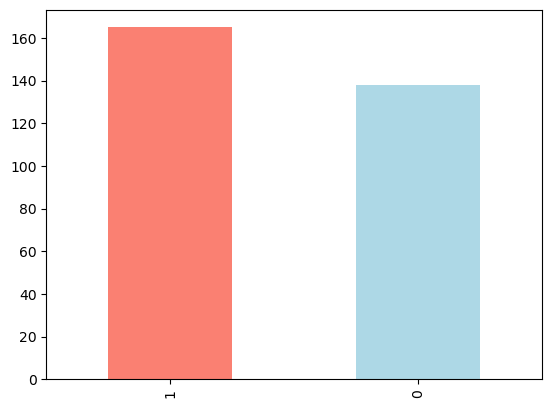

In [6]:
df["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [7]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# numerical infos about columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Compare different features
compare different columns, to develop an intuition which features are associated with the target variable

**heart disease frequency according to sex**

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# compare target with sex
crosstab = pd.crosstab(df.target, df.sex)
crosstab

sex,0,1
target,,
0,24,114
1,72,93


''

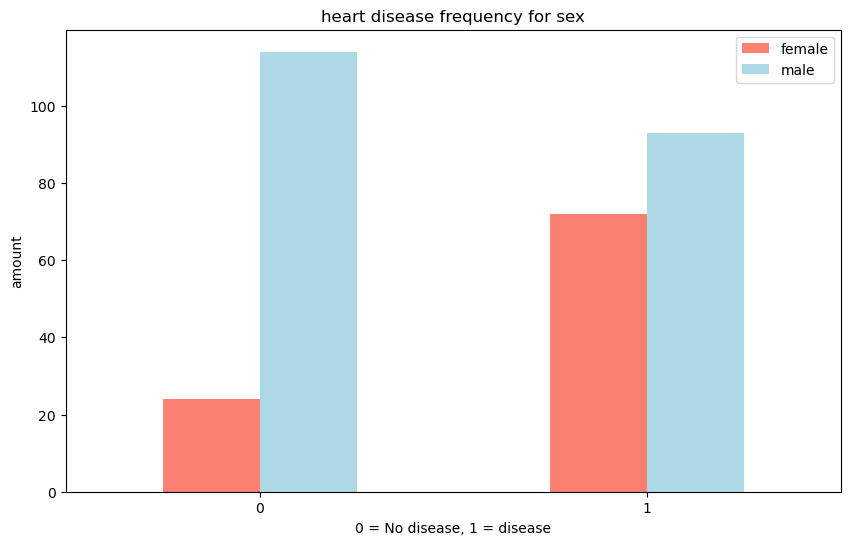

In [12]:
# create a plot of crosstab
crosstab.plot(kind = "bar", figsize = (10,6), color = ["salmon", "lightblue"])
plt.title("heart disease frequency for sex")
plt.xlabel("0 = No disease, 1 = disease")
plt.ylabel("amount")
plt.legend(["female", "male"])
plt.xticks(rotation = 0)
;

In [13]:
# heuristic: a female has a higher risk of heartdisease than a male? 
# 3 out of 4 women, 1 out of 2 men have heart disease

In [14]:
# percentage of heart disease
male = np.round(93/207 * 100, decimals = 2)
female = np.round(72/96 * 100, decimals = 2)

In [15]:
percentage_df = pd.DataFrame([male, female], index = ("male", "female"), columns = ["heart disease (%)"])
percentage_df

,heart disease (%)
male,44.93
female,75.00


''

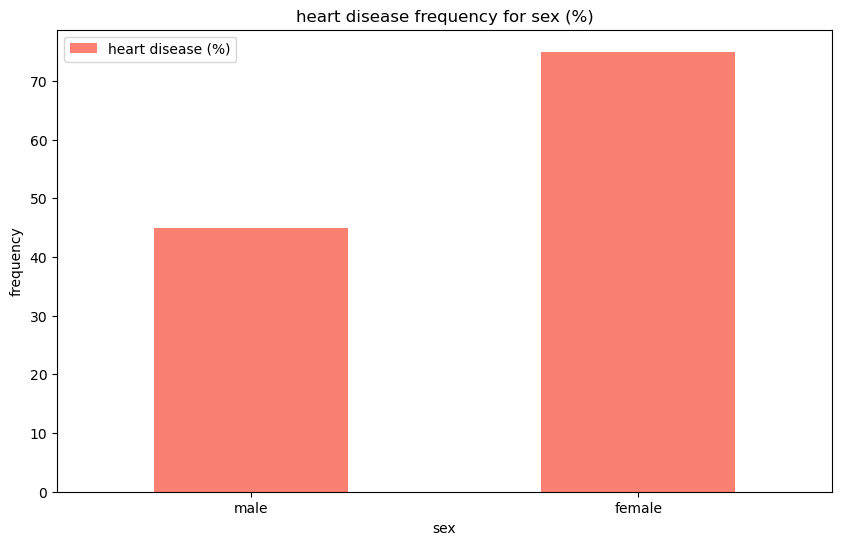

In [16]:
percentage_df.plot.bar(figsize = (10,6), color = ["salmon"])
plt.title("heart disease frequency for sex (%)")
plt.xlabel("sex")
plt.ylabel("frequency")
plt.xticks(rotation = 0)
;

**heart disease frequency according to age and thalach**

In [17]:
df.thalach.value_counts() # maximum heart rate

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

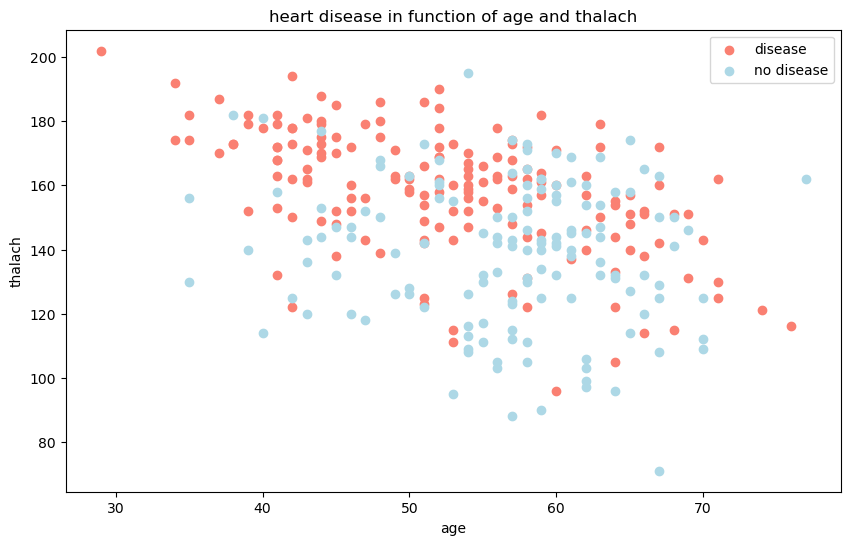

In [18]:
# create another figure
plt.figure(figsize = (10,6))

# scatter with positive examples
plt.scatter(df.age[df.target == 1], df.thalach[df.target ==1], c = "salmon");

# scatter with negative examples
plt.scatter(df.age[df.target == 0], df.thalach[df.target ==0], c = "lightblue");

# add some helpful info
plt.title("heart disease in function of age and thalach")
plt.xlabel("age")
plt.ylabel("thalach")
plt.legend(["disease", "no disease"])


In [19]:
# inference: downward trend: young patients with heart disease have higher heartrate than older patients

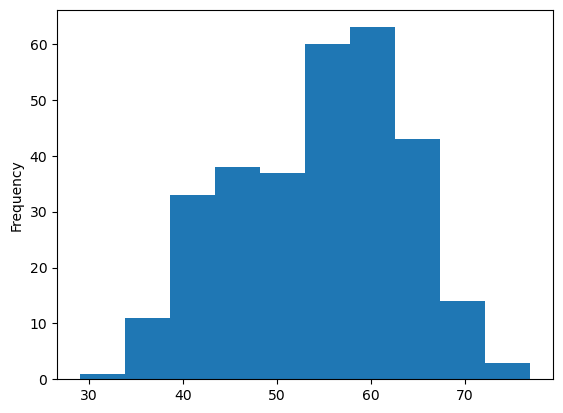

In [20]:
# check the distribution of age with histogram
df.age.plot.hist();

In [21]:
# are there any outliers?

**heart disease freqency according to chest pain**

p - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [22]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [23]:
# be aware: pain type 0 to 3 is categorical, not numerical! => we need to encode them (cp, thal, slope)

''

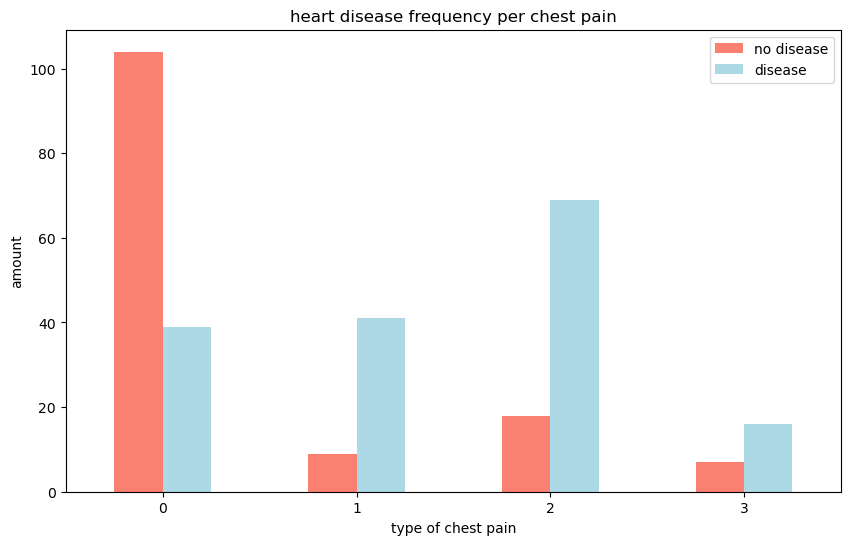

In [24]:
# create a plot of crosstab
pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize = (10,6), color = ["salmon", "lightblue"])
plt.title("heart disease frequency per chest pain")
plt.xlabel("type of chest pain")
plt.ylabel("amount")
plt.legend(["no disease", "disease"])
plt.xticks(rotation = 0)
;

## Making a Correlation matrix

In [25]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


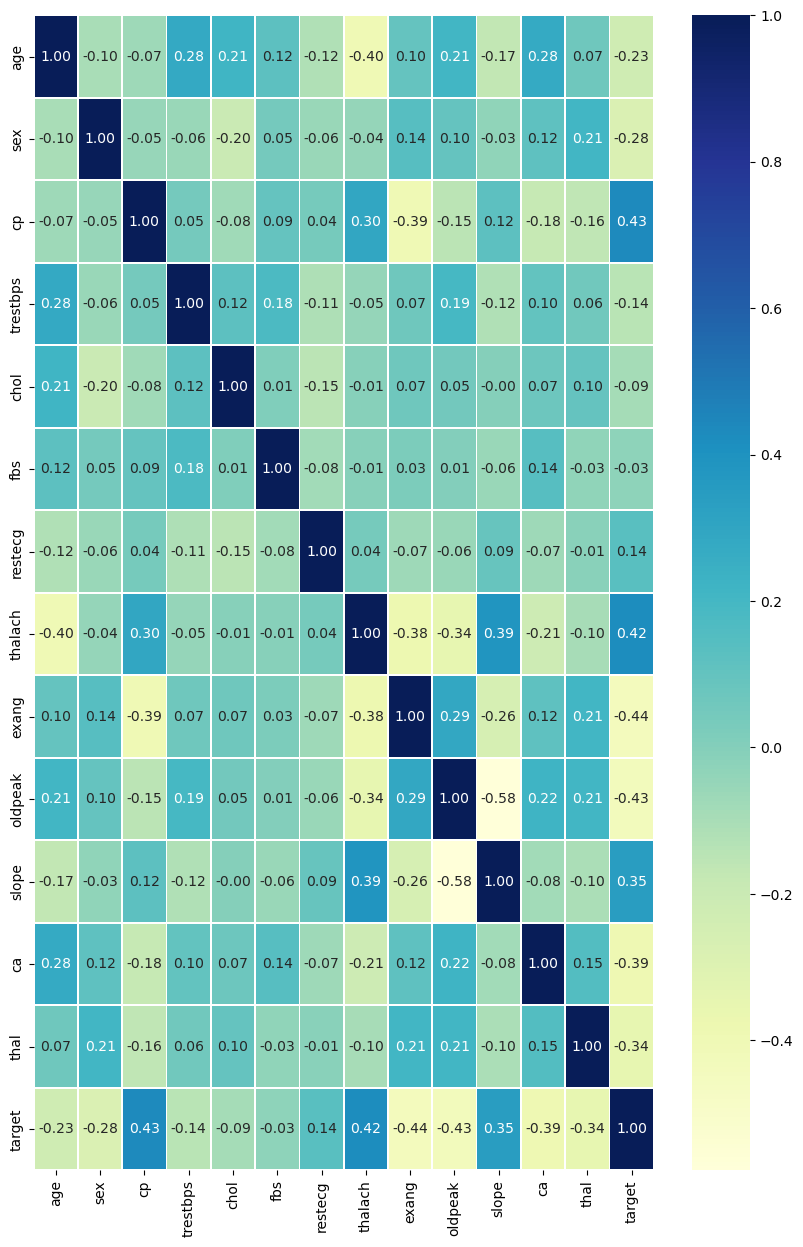

In [26]:
# visualize corr matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (10,15))
ax = sns.heatmap (corr_matrix, annot = True, linewidths= 0.5, fmt = ".2f", cmap = "YlGnBu")

In [27]:
# example: exang and target correlate with -.44: if exang goes up, target goes down => if you have heart pain during exercise, the risk of heart disease decreases?

## 5. Modelling

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# Split data into X and y
X = df.drop ("target", axis = 1)
y = df.target

In [30]:
# split data in train and test set
np.random.seed(42) # to make the split reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

As we have split the data, we can build a model now.

We will try 3 different models:
1. LogisticRegression
2. K-Nearest Neighbors Classifier
3. RandomForestClassifier


In [31]:
# put models into a dictionary
model_dic = {"Logistic Regression" : LogisticRegression(),
             "KN Neighbors" : KNeighborsClassifier(),
             "Random Forest" : RandomForestClassifier()}

In [32]:
# build a function
def fit_and_score(model_dic, X_train, X_test, y_train, y_test):
    """
    fits and trains different machine learning models
    """
    np.random.seed(42)
    model_scores = {}
    for model_name, model in model_dic.items():
        # train
        model.fit(X_train, y_train)
        # evaluate
        score = model.score(X_test, y_test)
        model_scores[model_name] = score
        print(f"The model {model_name} has a score of {score}")

    return model_scores

In [33]:
model_scores = fit_and_score(model_dic, X_train, X_test, y_train, y_test)

C:\Users\aa\Documents\Studium_Trier\Studium_aktuell\Udemy\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The model Logistic Regression has a score of 0.8852459016393442
The model KN Neighbors has a score of 0.6885245901639344
The model Random Forest has a score of 0.8360655737704918


In [34]:
model_scores


{'Logistic Regression': 0.8852459016393442,
 'KN Neighbors': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### visualize model comparison 

In [35]:
comparison = pd.DataFrame(model_scores, index = ["accuracy"]) 

In [36]:
comparison

,Logistic Regression,KN Neighbors,Random Forest
accuracy,0.885246,0.688525,0.836066


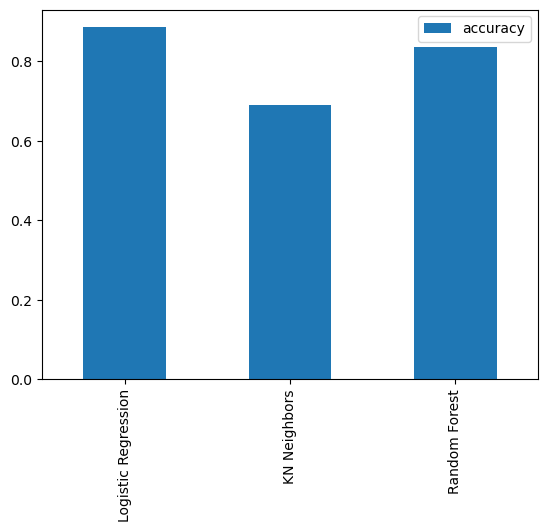

In [37]:
comparison.T.plot.bar();

## 6. Experimentation

Now we have a baseline model - next steps:
* Hyperparameter Tuning
* feature importance
* confusion matrix
* cross-validation
* precision, recall, f1 score
* classification report
* ROC curce
* AUC (area under curve)

### Hyperparameter Tuning by hand

In [38]:
# Lets tune KNN
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # fit
    knn.fit(X_train, y_train)

    # update training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # update test scores
    test_scores.append(knn.score(X_test, y_test))

In [39]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [40]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum Knn socre on the test data: 75.41%


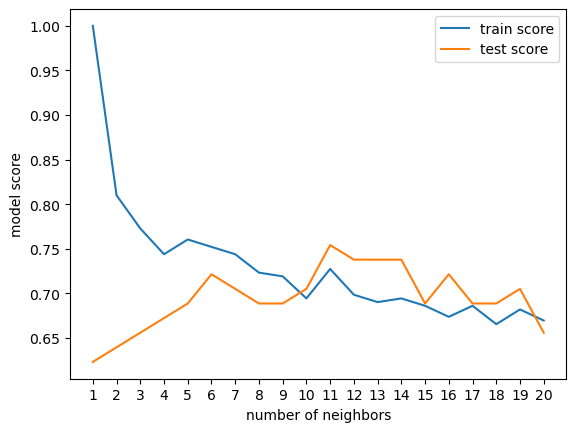

In [41]:
plt.plot(neighbors, train_scores, label = "train score")
plt.plot(neighbors, test_scores, label = "test score")
plt.xticks(np.arange(1,21, 1))
plt.xlabel("number of neighbors")
plt.ylabel("model score")
plt.legend()
print(f"Maximum Knn socre on the test data:{max(test_scores)*100: .2f}%")

In [42]:
# this is step 6: Experimentation

## Hyperparameter tuning with RandomizedSearchCV



In [46]:
# create a hyperparameter grid for Logistic regression
log_reg_grid = {"C": np.logspace(-4,4,20), 
                "solver" : ["liblinear"]}

# create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2)}

In [50]:
# Tune Logistic Regression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                log_reg_grid,
                                cv=5,
                                n_iter = 20,
                                verbose = True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [51]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [53]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [55]:
# Tune RandomForest
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           rf_grid,
                           cv = 5,
                           n_iter = 20, 
                           verbose = True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [56]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [57]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [58]:
# compare with baseline
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KN Neighbors': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [59]:
#conclusion: logisitic regression performs best

## Tuning Hyperparameters with grid search

In [65]:
# different hyperparameter grids
# create a hyperparameter grid for Logistic regression
log_reg_grid = {"C": np.logspace(-4,4, 30), 
                "solver" : ["liblinear"]}
# setup
gs_log_reg = GridSearchCV(LogisticRegression(),
                          log_reg_grid,
                          cv = 5,
                         verbose = 2)

# fit
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [67]:
# best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [68]:
# evaluate
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [69]:
# we can not perform better than baseline log reg

In [70]:
# create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2)}

gs_rf = GridSearchCV(RandomForestClassifier(),
                    rf_grid,
                    cv = 5)

In [72]:
# train and test
#gs_rf.fit(X_train, y_train)
#gs_rf.score(X_test, y_test)

## Evaluationg our tuned ml model (beyond accuracy)

* ROC curve and AOC
* confusion matrix
* classification report
* precision
* recall
* f1

to make comparisons we need to make predictions


In [73]:
# Make predicitions
y_preds = gs_log_reg.predict(X_test)

In [74]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

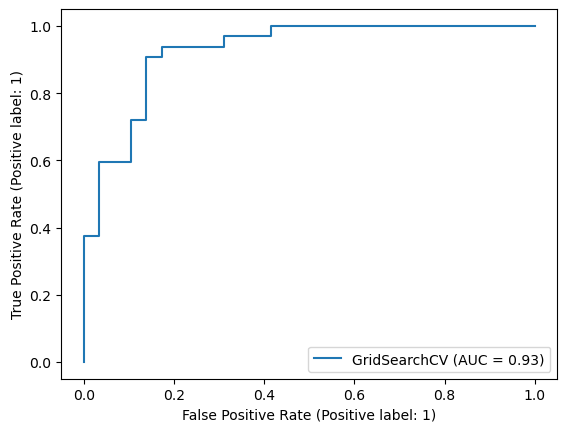

In [77]:
# ROC curve: true positive vs. false positive
# plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [81]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [88]:
# make confusion matrix more visual
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    plots a nice looking confusion matrix using seaborns heatmaps
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap (confusion_matrix(y_test, y_preds),
                    annot = True, cbar = False)
    plt.xlabel("predicted label")
    plt.ylabel("true label")

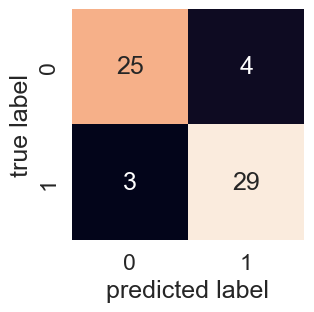

In [87]:
plot_conf_mat(y_test, y_preds)

In [91]:
# classification report (not cross validated)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [95]:
# precision = 1, if no false positive
# recall = 1, if no false negative

**calculate evaluation metrics using cross-validation**

In [98]:
# check best hyperparams
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [103]:
# create new classifier with best params
clf = LogisticRegression(C = 0.20433597178569418, 
                         solver = "liblinear")

In [118]:
# cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring = "accuracy")
cv_acc = np.mean(cv_acc)

In [119]:
# cross-validated precision
cv_prec = cross_val_score(clf, X, y, cv=5, scoring = "precision")
cv_prec = np.mean(cv_prec)

In [120]:
# cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring = "recall")
cv_recall = np.mean(cv_recall)

In [121]:
# cross-validated f1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring = "f1")
cv_f1 = np.mean(cv_f1)

In [126]:
# visualize the metrics
cv_metrics = pd.DataFrame({"acc" : cv_acc,
                           "prec" : cv_prec,
                           "recall" : cv_recall,
                           "f1" : cv_f1}, index = [0])


In [127]:
cv_metrics

,acc,prec,recall,f1
0,0.844699,0.820794,0.921212,0.867301


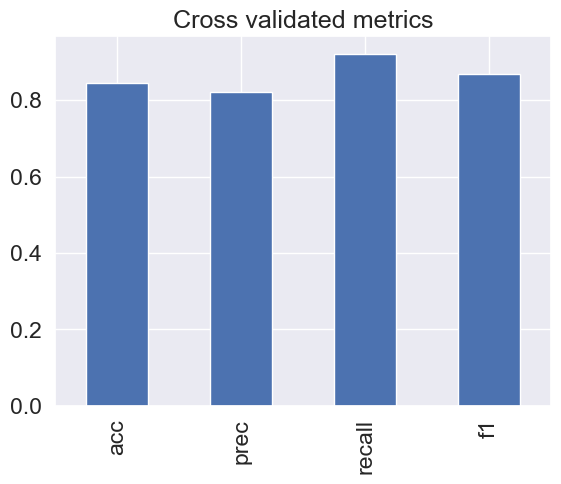

In [131]:
cv_metrics.T.plot.bar(title = "Cross validated metrics",
                     legend = False);

### Feature importance

Question: which features contributed mostly to the outcome and how?

Finding feature importance is different for each ml model

In [132]:
# fit an instance of Logistic Regression with best params
clf = LogisticRegression(C = 0.20433597178569418, 
                         solver = "liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [133]:
# check coef_
# how much does each feature contribute to outcome?
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [135]:
# match coef of each feature to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

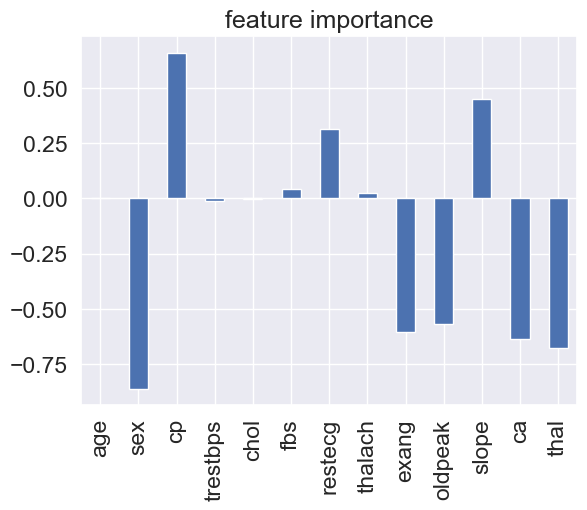

In [138]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "feature importance", legend = False);

In [139]:
# compare to correlation matrix
# model driven data analysis
# find out more about the data
# changes how you collect data: features with low importance don't need much data
# reduce number of features for the model (features that don't contribute)

## 6. Experimentation

proof of concept => everything is experimentation

up to now: we did not fulfill the accuracy of 95% (out best: 88%) => what to do?
* collect more data
* try a better model (CatBoost, XGBoost)
* improve the current model (hyperparameter tuning)
* if good enough, export and share model
